# Solving Differential Equation using Normal neural Network
# Differentail Equation : dy/dx = -2y with y(0)=1

# Import required libraries


In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


# Define the neural network model


In [8]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.hidden(x)


# Defining the differential equation dy/dx = -2y


In [22]:
def differential_equation(x, y_pred):
    dy_dx = torch.autograd.grad(y_pred, x, grad_outputs=torch.ones_like(y_pred), create_graph=True)[0]
    return dy_dx + 2 * y_pred


# Trial solution to satisfy the initial condition: y(0) = 1


In [23]:
def trial_solution(x, net_out):
    return 1 + x * net_out


# Generate training data in the domain [0, 2]


In [24]:
x_train = torch.linspace(0, 2, 100).reshape(-1, 1)
x_train.requires_grad = True


# Initialize the model and optimizer


In [25]:
 model = NeuralNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


# Initialising loop

In [26]:
epochs = 5000
loss_fn = nn.MSELoss()

for epoch in range(epochs):
    optimizer.zero_grad()

    net_out = model(x_train)
    y_hat = trial_solution(x_train, net_out)

    de_residual = differential_equation(x_train, y_hat)
    loss = loss_fn(de_residual, torch.zeros_like(de_residual))

    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")


Epoch 0: Loss = 5.495941
Epoch 500: Loss = 0.000265
Epoch 1000: Loss = 0.000072
Epoch 1500: Loss = 0.000036
Epoch 2000: Loss = 0.000030
Epoch 2500: Loss = 0.000025
Epoch 3000: Loss = 0.000021
Epoch 3500: Loss = 0.000016
Epoch 4000: Loss = 0.000083
Epoch 4500: Loss = 0.000007


# Plotting the result


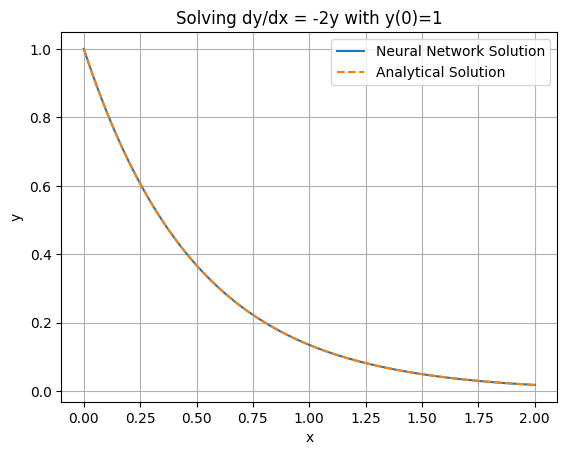

In [27]:
x_test = torch.linspace(0, 2, 100).reshape(-1, 1)
with torch.no_grad():
    y_nn = trial_solution(x_test, model(x_test))
    y_true = torch.exp(-2 * x_test)

plt.plot(x_test.numpy(), y_nn.numpy(), label="Neural Network Solution")
plt.plot(x_test.numpy(), y_true.numpy(), '--', label="Analytical Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Solving dy/dx = -2y with y(0)=1")
plt.grid(True)
plt.show()
